# MTMT co-authorship Network

In [30]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
import pathlib
import glob

import json

import networkx as nx

import re
import uuid

In [2]:
file = open("data/publication2.json","rt",encoding="utf-8")
data = json.load(file)

file.close()

In [3]:
data.keys()

dict_keys(['labelLang', 'responseDate', 'paging', 'content'])

In [4]:
len(data['content'])

5000

In [5]:
for i in data['content'][0].keys():
    print(i)

otype
mtid
status
published
unhandledTickets
deleted
lastRefresh
lastModified
created
creator
lastDuplumOK
lastDuplumSearch
validated
validator
core
citation
publicationPending
type
subType
category
languages
firstAuthor
authorships
title
identifiers
journal
volume
issue
internalId
firstPageOrInternalIdForSort
pageLength
publishedYear
abstractText
subjects
keywords
digital
printed
sourceYear
foreignEdition
foreignLanguage
fullPublication
conferencePublication
nationalOrigin
missingAuthor
oaType
oaCheckDate
oaFree
oaLink
citationCount
citationCountUnpublished
citationCountWoOther
independentCitCountWoOther
nationalOriginCitationCount
foreignEditionCitationCount
doiCitationCount
wosCitationCount
scopusCitationCount
wosScopusCitationCount
wosScopusCitationCountWoOther
wosScopusIndependentCitationCount
wosScopusIndependentCitationCountWoOther
independentCitationCount
selfCitationCount
unhandledCitationCount
citingPubCount
independentCitingPubCount
citingPubCountWoOther
independentCitingPub

In [6]:
print(len(data['content']))

5000


In [7]:
data['content'][0]['label']

'Aad G et al. Search for exotic decays of the Higgs boson into long-lived particles in pp collisions at root s=13 TeV using displaced vertices in the ATLAS inner detector. (2021) JOURNAL OF HIGH ENERGY PHYSICS 1126-6708 1029-8479 2021 11'

In [8]:
data['content'][0]['published']

True

In [9]:
data['content'][0].keys()

dict_keys(['otype', 'mtid', 'status', 'published', 'unhandledTickets', 'deleted', 'lastRefresh', 'lastModified', 'created', 'creator', 'lastDuplumOK', 'lastDuplumSearch', 'validated', 'validator', 'core', 'citation', 'publicationPending', 'type', 'subType', 'category', 'languages', 'firstAuthor', 'authorships', 'title', 'identifiers', 'journal', 'volume', 'issue', 'internalId', 'firstPageOrInternalIdForSort', 'pageLength', 'publishedYear', 'abstractText', 'subjects', 'keywords', 'digital', 'printed', 'sourceYear', 'foreignEdition', 'foreignLanguage', 'fullPublication', 'conferencePublication', 'nationalOrigin', 'missingAuthor', 'oaType', 'oaCheckDate', 'oaFree', 'oaLink', 'citationCount', 'citationCountUnpublished', 'citationCountWoOther', 'independentCitCountWoOther', 'nationalOriginCitationCount', 'foreignEditionCitationCount', 'doiCitationCount', 'wosCitationCount', 'scopusCitationCount', 'wosScopusCitationCount', 'wosScopusCitationCountWoOther', 'wosScopusIndependentCitationCount',

In [10]:
data['content'][0]['title']

'Search for exotic decays of the Higgs boson into long-lived particles in pp collisions at root s=13 TeV using displaced vertices in the ATLAS inner detector'

In [11]:
data['responseDate']

'2022-02-17 13:33'

In [12]:
data['paging']

{'last': True,
 'first': True,
 'totalPages': 1,
 'totalElements': 5000,
 'totalEstimatedElements': 110000,
 'size': 5000,
 'number': 1,
 'numberOfElements': 5000,
 'sort': [{'direction': 'DESC',
   'property': 'publishedYear',
   'ascending': False},
  {'direction': 'ASC', 'property': 'firstAuthor', 'ascending': True}]}

In [13]:
print(data['content'][0]['authorships'][0]['mtid'])
print(data['content'][0]['authorships'][0]['givenName'])
print(data['content'][0]['authorships'][0]['familyName'])
print(data['content'][0]['authorships'][0]['label'])

99807928
G
Aad
Aad, G


In [14]:
data['content'][34]['authorships'][0]

{'otype': 'PersonAuthorship',
 'mtid': 95886196,
 'link': '/api/authorship/95886196',
 'label': 'Abdullah, S. Alshammari ✉ [Alshammari, Abdullah Saber (Educational science), szerző] Neveléstudományi Doktori Iskola (SZTE / DI)',
 'listPosition': 1,
 'share': 0.33333334,
 'first': True,
 'last': False,
 'corresponding': True,
 'author': {'otype': 'Author',
  'mtid': 10064710,
  'link': '/api/author/10064710',
  'label': 'Alshammari Abdullah Saber (Educational science)',
  'familyName': 'Alshammari',
  'givenName': 'Abdullah Saber',
  'published': True,
  'oldId': 10064710,
  'snippet': True},
 'familyName': 'Abdullah',
 'givenName': 'S. Alshammari',
 'authorTyped': True,
 'editorTyped': False,
 'otherTyped': False,
 'type': {'otype': 'AuthorshipType',
  'mtid': 1,
  'link': '/api/authorshiptype/1',
  'label': 'Szerző',
  'code': 0,
  'published': True,
  'oldId': 0,
  'snippet': True},
 'published': False,
 'snippet': True}

In [15]:
data['content'][0]['authorships'][0]

{'otype': 'PersonAuthorship',
 'mtid': 99807928,
 'link': '/api/authorship/99807928',
 'label': 'Aad, G',
 'listPosition': 1,
 'share': 0.0,
 'first': True,
 'last': False,
 'corresponding': False,
 'familyName': 'Aad',
 'givenName': 'G',
 'authorTyped': True,
 'editorTyped': False,
 'otherTyped': False,
 'type': {'otype': 'AuthorshipType',
  'mtid': 1,
  'link': '/api/authorshiptype/1',
  'label': 'Szerző',
  'code': 0,
  'published': True,
  'oldId': 0,
  'snippet': True},
 'published': False,
 'snippet': True}

In [16]:
temp_mem = []

for i in range(len(data['content'][0]['authorships'])):
    temp_mem.append(data['content'][0]['authorships'][i]['share'])

In [17]:
np.unique(temp_mem)

array([0.])

They are rather inconsistent in how well these object are defined.

In [18]:
110000/5000

22.0

In [19]:
sub_mem = []
for i in range(len(data['content'])):
    sub_mem.append(len(data['content'][i]['authorships']))
sub_mem = np.array(sub_mem)

In [20]:
print(np.mean(sub_mem), "+/-", np.var(sub_mem)**(1/2))

19.9854 +/- 187.9649701057088


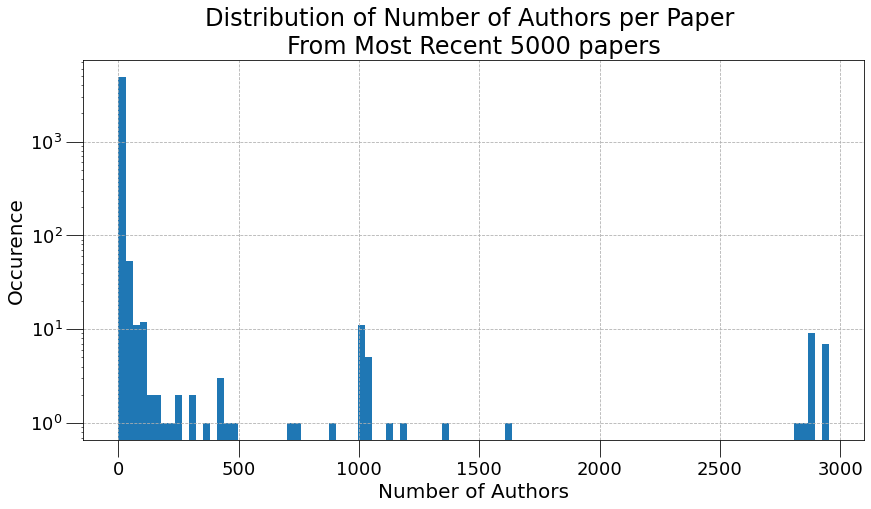

In [21]:
plt.figure(figsize=(14,7))

plt.title("Distribution of Number of Authors per Paper \nFrom Most Recent 5000 papers", fontsize=24)

plt.hist(sub_mem, bins=101)

plt.xlabel("Number of Authors", fontsize=20)
plt.ylabel("Occurence", fontsize=20)
plt.tick_params(labelsize=18,axis="both",size=17)

plt.yscale("log")
plt.grid(linestyle="--")

plt.savefig("figs/dist_from_5000sample.pdf",format="pdf",bbox_inches="tight")
plt.show()

## How to store tables?

How should i store the linklist and the decoding?

| startNode | endNode | time |
| --- | --- | --- |
| author1.mtid | author2.mtid | yearOfpublication |
| author1.mtid | author3.mtid | yearOfpublication |
| ... | ... | ... |

This template may work, but its not good if the `mtid` is not unique to a given author -> might need to test this!

For the decoding table, the given table should be sufficient:

| mtid | Name |
| --- | --- |
| 1212211 | Adam G. Taylor |
| ... | ... |

In [22]:
data_test_links = []


In [23]:
temp_mem = []
count = 0
for i in range(len(data['content'])):
    for j in range(len(data['content'][i]['authorships'])):
        if (data['content'][i]['authorships'][j]['otype'] == 'PersonAuthorship'):
            string_to_add = '' 
            if 'givenName' in data['content'][i]['authorships'][j]:
                string_to_add += str(data['content'][i]['authorships'][j]['givenName']) + ' '
            if 'familyName' in data['content'][i]['authorships'][j]:
                string_to_add += str(data['content'][i]['authorships'][j]['familyName']) + ', '
            string_to_add += str(data['content'][i]['publishedYear'])
            temp_mem.append(string_to_add)

temp_mem2 = []
for i in range(len(data['content'])):
    for j in range(len(data['content'][i]['authorships'])):
        if (data['content'][i]['authorships'][j]['otype'] == 'PersonAuthorship'):
            string_to_add = '' 
            if 'mtid' in data['content'][i]['authorships'][j]:
                string_to_add += str(data['content'][i]['authorships'][j]['mtid']) + ' '
            temp_mem2.append(string_to_add)

In [24]:
len(np.unique(temp_mem)), len(temp_mem)

(32220, 99838)

In [25]:
_,app_count = np.unique(temp_mem, return_counts=True)
np.unique(app_count, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 35, 36, 42,
        43, 48, 54, 83], dtype=int64),
 array([16833,  4953,  2245,  2794,   276,   524,   368,  1332,   184,
          145,   756,   112,    43,  1530,    34,    20,     6,     3,
            5,     4,     4,    11,     2,     4,     5,     1,     9,
            1,     2,     4,     2,     1,     2,     1,     1,     1,
            1,     1], dtype=int64))

In [26]:
_,app_count = np.unique(temp_mem2, return_counts=True)
np.unique(app_count, return_counts=True)

(array([1], dtype=int64), array([99838], dtype=int64))

Sooooo, `mtid` is unique to the creation of such object...

Old trick: use their name as a source for the uuid to hide their identity, while it is deterministic. The logic of choosing a uuid will be hidden though.

In [27]:
data['content'][0]['authorships'][0]

{'otype': 'PersonAuthorship',
 'mtid': 99807928,
 'link': '/api/authorship/99807928',
 'label': 'Aad, G',
 'listPosition': 1,
 'share': 0.0,
 'first': True,
 'last': False,
 'corresponding': False,
 'familyName': 'Aad',
 'givenName': 'G',
 'authorTyped': True,
 'editorTyped': False,
 'otherTyped': False,
 'type': {'otype': 'AuthorshipType',
  'mtid': 1,
  'link': '/api/authorshiptype/1',
  'label': 'Szerző',
  'code': 0,
  'published': True,
  'oldId': 0,
  'snippet': True},
 'published': False,
 'snippet': True}

## UUID.UUID5 for hiding information

I will be using uuid.uuid5 for hidin information to hide personal information for the sake of clean analysis. Later on we can insert such information back, take a look at it and draw conclusions.

In [36]:
print(uuid.uuid5(uuid.NAMESPACE_DNS,(data['content'][0]['authorships'][0]['givenName'] +
                                     ' ' +
                                     data['content'][0]['authorships'][0]['familyName'])))

61977f7f-ec8f-5de5-8a2f-e476a11c4455


In [72]:
temp_mem = []
temp_link_list = []
r = re.compile(r"\s+", re.MULTILINE)

count = 0
for i in range(len(data['content'])):
    if (i+1) % 10 == 0:
        sys.stdout.write("\r {0} / {1}".format(i+1,len(data['content'])))
        sys.stdout.flush()
    content_mem = []
    for j in range(len(data['content'][i]['authorships'])):
        
        if (data['content'][i]['authorships'][j]['otype'] == 'PersonAuthorship'):
            name_to_add = ''
            string_to_add = '' 
            #if the field extists, get the name! -> what if none of them exists?
            if 'givenName' in data['content'][i]['authorships'][j]:
                name_to_add += str(data['content'][i]['authorships'][j]['givenName']) + ' '
            if 'familyName' in data['content'][i]['authorships'][j]:
                name_to_add += str(data['content'][i]['authorships'][j]['familyName'])
            
            uuid_encoded = str(uuid.uuid5( uuid.NAMESPACE_DNS,r.sub("",name_to_add) ) )
            string_to_add += name_to_add + ', '
            string_to_add += uuid_encoded + ', '
            string_to_add += str(data['content'][i]['publishedYear'])
            content_mem.append(uuid_encoded)
            temp_mem.append(string_to_add)
            
    if (len(content_mem) > 0):
        for j in range(len(content_mem)):
            for k in np.arange(i+1,len(content_mem)):
                temp_link_list.append([content_mem[j],content_mem[k]])

 5000 / 5000

In [82]:
apps,app_count = np.unique(temp_mem, return_counts=True)
c1,c2 = np.unique(app_count, return_counts=True)

print(len(apps), len(c1),len(c2))

32220 38 38


This makes it obvious that the encoded gives the same result as the not encoded, meaning that using their name is acceptable to create the decoding list and the linklist with dates included.

In [61]:
temp_mem[0]

'G Aad, c18e8dfa-bd32-55d6-9733-d94c8bd51372, 2021'

In [73]:
len(temp_link_list)

175160982

In [79]:
len(temp_link_list) / len(apps)**2

0.16872766605749345

In [80]:
2800 ** 2

7840000

In [86]:
#np.savetxt('data/decoding_s_5000.csv', temp_mem, delimiter=",",fmt='%s',encoding="utf-8")
#np.savetxt('data/sample5000.csv', temp_link_list, delimiter=",",fmt='%s',encoding="utf-8")

This seems huge but... I don't think this is a bad or wrong result, because there are a couple of mass co-athor publiations, which comes with a fully connecter graph that is jus huge in itsef.

In [99]:
170000000 * 2 * 32 /1024 / 8 / 1024 / 1024

1.2665987014770508

In [98]:
638 * 1906 * 1060 * 3 * 2 / 1024 / 1024 / 1024

7.202791124582291

# Network Objects

Networkx for the win! I used it a couple of times, but rarely, meaning that I need a quic recap for it.

## Test Network initialized

In [28]:
test_graph = nx.Graph()

test_links = np.array([[1,2],
                       [2,3],
                       [1,3],
                       [4,4],
                      [5,5],
                      [6,6]])

test_graph.add_edges_from(test_links)

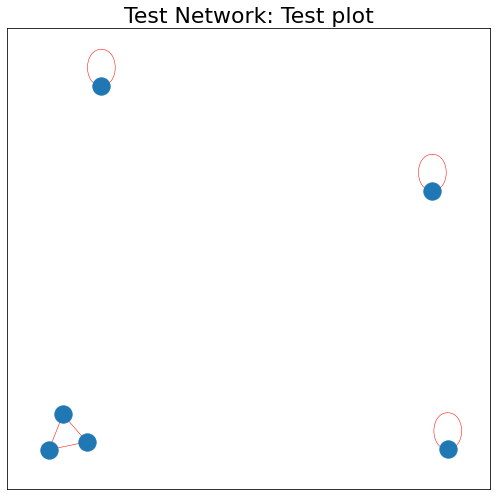

In [29]:
#test plot 
fig = plt.figure(figsize=(7,7))

plt.title("Test Network: Test plot", fontsize=22)

pos = nx.spring_layout(test_graph)

nx.draw_networkx_nodes(test_graph,
                      pos,
                      nodelist = np.array(test_graph.nodes)
                      )

nx.draw_networkx_edges(test_graph,
                      pos,
                      width=0.5,
                      edge_color='r',
                      arrows=False)
fig.tight_layout()

plt.show()

So I could, in theory, contain all authors from all publications, but seems **unnecessary**.

## Creating the network from temp_link_list

Its huge in size, its massive, will netx handle it? Probably not...

In [87]:
sample_graph = nx.Graph()

sample_graph.add_edges_from(temp_link_list)

MemoryError: 

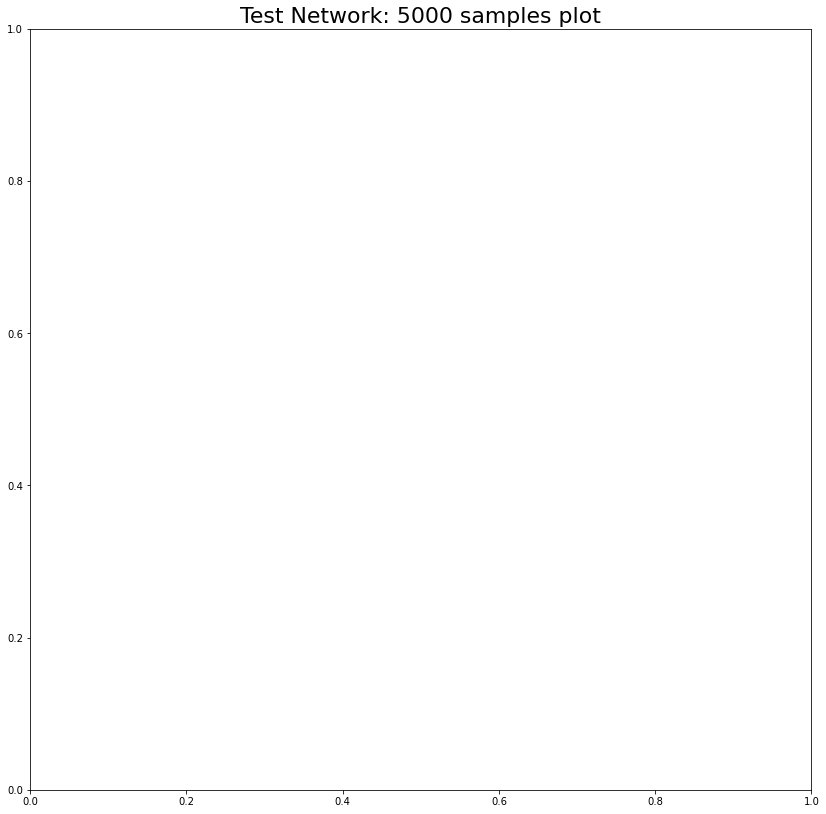

In [142]:
fig = plt.figure(figsize=(14,14))

plt.title("Test Network: 5000 samples plot", fontsize=22)

pos = nx.spring_layout(sample_graph)

nx.draw_networkx_nodes(sample_graph,
                      pos,
                      nodelist = np.array(sample_graph.nodes)
                      )
"""
nx.draw_networkx_edges(sample_graph,
                      pos,
                      width=0.5,
                      edge_color='r',
                      arrows=False)
"""
fig.tight_layout()

plt.show()

In [95]:
asd = np.unique(temp_mem)
print(len(asd))

32220


In [109]:
sub_asd = []
for i in range(len(asd)):
    sub_asd.append(asd[i].split()[-2].replace(',',''))

Still not ghood enough fo memory -> going into number territory...

In [122]:
number_decode = np.array(list(zip(np.array(sub_asd), np.arange(len(sub_asd)+1))))
number_decode

array([['f47f56b2-6ad5-5701-a27f-36b6cd0ef6dd', '0'],
       ['2a1738c6-7c8c-5691-85d4-fdc516a5283e', '1'],
       ['e569efac-02eb-5cdb-b620-02c667eadd35', '2'],
       ...,
       ['1b81ff05-88c4-548b-8153-41c7e8af1587', '32217'],
       ['dd5338c7-37ba-512f-8c4c-e4e1fe644531', '32218'],
       ['086b22d5-b7db-578c-80f1-dd517e3aa52f', '32219']], dtype='<U36')

In [140]:
number_link_list = np.zeros((len(temp_link_list),2), dtype=np.int16)
for i in range(len(temp_link_list)):
    if (i+1) % 1000 == 0:
        sys.stdout.write("\r {0} / {1}".format(i+1,len(temp_link_list)))
        sys.stdout.flush()
    #first one
    number_link_list[i,0] = np.int16(number_decode[number_decode[:,0] == temp_link_list[i][0]][0][1])
    number_link_list[i,1] = np.int16(number_decode[number_decode[:,0] == temp_link_list[i][1]][0][1])

 412000 / 175160982

KeyboardInterrupt: 

In [89]:
import igraph

In [112]:
iSampleG = igraph.Graph()

iSampleG.add_vertices(sub_asd)
iSampleG.add_edges(temp_link_list)

MemoryError: Error at src/graph/type_indexededgelist.c:307: cannot add edges. -- Out of memory